# Importing Libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading the Dataset

In [166]:
import pandas as pd
import sqlite3
import numpy as np

# Create the database and table first
def create_database():
    conn = sqlite3.connect('inventory.db')
    
    # Create sample data
    sample_data = {
        'VendorNumber': [4425, 4426, 4427, 4428, 4429],
        'VendorName': ['MARTIGNETTI COMPANIES', 'Vendor B', 'Vendor C', 'Vendor D', 'Vendor E'],
        'Brand': [809, 810, 811, 812, 813],
        'Description': ['Southern Comfort', 'Product B', 'Product C', 'Product D', 'Product E'],
        'PurchasePrice': [6.53, 7.50, 8.25, 9.10, 10.00],
        'ActualPrice': [9.99, 11.50, 12.75, 13.90, 15.00],
        'Volume': [750.0, 800.0, 700.0, 900.0, 850.0]
    }
    
    df = pd.DataFrame(sample_data)
    df.to_sql('vendor_sales_summary', conn, if_exists='replace', index=False)
    conn.close()
    print("Database created successfully!")

# Run this first
create_database()

Database created successfully!


In [167]:
import sqlite3
import pandas as pd

def check_and_load_data():
    conn = sqlite3.connect('inventory.db')
    
    # Check if table exists
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='vendor_sales_summary'")
    table_exists = cursor.fetchone()
    
    if table_exists:
        df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
        print("Data loaded successfully!")
        print(df.head())
    else:
        print("Table 'vendor_sales_summary' does not exist. Creating sample data...")
        # Create sample data as in Option A
        create_sample_database()
        df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
    
    conn.close()
    return df

# Use this function
df = check_and_load_data()

Data loaded successfully!
   VendorNumber             VendorName  Brand       Description  \
0          4425  MARTIGNETTI COMPANIES    809  Southern Comfort   
1          4426               Vendor B    810         Product B   
2          4427               Vendor C    811         Product C   
3          4428               Vendor D    812         Product D   
4          4429               Vendor E    813         Product E   

   PurchasePrice  ActualPrice  Volume  
0           6.53         9.99   750.0  
1           7.50        11.50   800.0  
2           8.25        12.75   700.0  
3           9.10        13.90   900.0  
4          10.00        15.00   850.0  


In [168]:
import pandas as pd
import sqlite3
import numpy as np

# First, create the database and table
def setup_database():
    conn = sqlite3.connect('inventory.db')
    
    # Create sample vendor data
    sample_data = {
        'VendorNumber': [4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432],
        'VendorName': ['MARTIGNETTI COMPANIES', 'Vendor B', 'Vendor C', 'Vendor D', 
                      'Vendor E', 'Vendor F', 'Vendor G', 'Vendor H'],
        'Brand': [809, 810, 811, 812, 813, 814, 815, 816],
        'Description': ['Southern Comfort', 'Vodka Premium', 'Whiskey Reserve', 
                       'Gin Artisanal', 'Rum Caribbean', 'Tequila Anejo', 
                       'Brandy Fine', 'Champagne Brut'],
        'PurchasePrice': [6.53, 8.25, 12.75, 9.10, 7.80, 15.20, 22.50, 18.90],
        'ActualPrice': [9.99, 12.50, 18.75, 13.90, 11.80, 22.20, 32.50, 27.90],
        'Volume': [750.0, 800.0, 650.0, 900.0, 850.0, 700.0, 550.0, 600.0],
        'TotalPurchaseQuantity': [120, 85, 45, 150, 95, 60, 35, 75],
        'TotalPurchaseDollars': [783.6, 701.25, 573.75, 1365.0, 741.0, 912.0, 787.5, 1417.5],
        'TotalSalesQuantity': [115, 80, 42, 145, 90, 58, 33, 72],
        'TotalSalesDollars': [1148.85, 1000.0, 787.5, 2015.5, 1062.0, 1287.6, 1072.5, 2008.8],
        'TotalSalesPrice': [862.5, 640.0, 504.0, 1305.0, 765.0, 696.0, 445.5, 648.0],
        'TotalExciseTax': [57.6, 40.0, 25.2, 72.5, 45.0, 34.8, 19.8, 36.0],
        'FreightCost': [156.72, 140.25, 114.75, 273.0, 148.2, 182.4, 157.5, 283.5],
        'GrossProfit': [150.93, 118.5, 94.5, 265.0, 127.8, 159.6, 118.2, 268.8]
    }
    
    df_sample = pd.DataFrame(sample_data)
    
    # Calculate additional metrics
    df_sample['GrossProfit'] = df_sample['TotalSalesDollars'] - df_sample['TotalPurchaseDollars'] - df_sample['FreightCost']
    df_sample['ProfitMargin'] = (df_sample['GrossProfit'] / df_sample['TotalSalesDollars'] * 100).round(2)
    df_sample['StockTurnover'] = (df_sample['TotalSalesQuantity'] / df_sample['TotalPurchaseQuantity']).round(2)
    df_sample['SalesToPurchaseRatio'] = (df_sample['TotalSalesDollars'] / df_sample['TotalPurchaseDollars']).round(2)
    
    # Save to database
    df_sample.to_sql('vendor_sales_summary', conn, if_exists='replace', index=False)
    conn.close()
    
    print("Database created successfully with sample data!")
    return df_sample

# Run the setup
df = setup_database()
df.head()

Database created successfully with sample data!


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,4425,MARTIGNETTI COMPANIES,809,Southern Comfort,6.53,9.99,750.0,120,783.60,115,1148.85,862.5,57.6,156.72,208.53,18.15,0.96,1.47
1,4426,Vendor B,810,Vodka Premium,8.25,12.50,800.0,85,701.25,80,1000.00,640.0,40.0,140.25,158.50,15.85,0.94,1.43
2,4427,Vendor C,811,Whiskey Reserve,12.75,18.75,650.0,45,573.75,42,787.50,504.0,25.2,114.75,99.00,12.57,0.93,1.37
3,4428,Vendor D,812,Gin Artisanal,9.10,13.90,900.0,150,1365.00,145,2015.50,1305.0,72.5,273.00,377.50,18.73,0.97,1.48
4,4429,Vendor E,813,Rum Caribbean,7.80,11.80,850.0,95,741.00,90,1062.00,765.0,45.0,148.20,172.80,16.27,0.95,1.43


In [169]:
# Now this will work because df is defined
df.to_csv('vendor_sales_summary.csv', index=False)
print("CSV file created successfully!")

CSV file created successfully!


# Exploratory Data Analysis 
- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.


In [170]:
# Summary statistics for numerical columns
summary_stats = df.describe().T  
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8.0,4428.50000,2.449490,4425.00,4426.7500,4428.500,4430.2500,4432.00
Brand,8.0,812.50000,2.449490,809.00,810.7500,812.500,814.2500,816.00
PurchasePrice,8.0,12.62875,5.800656,6.53,8.1375,10.925,16.1250,22.50
ActualPrice,8.0,18.69250,8.213979,9.99,12.3250,16.325,23.6250,32.50
Volume,8.0,725.00000,122.474487,550.00,637.5000,725.000,812.5000,900.00
TotalPurchaseQuantity,8.0,83.12500,38.446391,35.00,56.2500,80.000,101.2500,150.00
TotalPurchaseDollars,8.0,910.20000,311.853850,573.75,731.0625,785.550,1025.2500,1417.50
TotalSalesQuantity,8.0,79.37500,37.316934,33.00,54.0000,76.000,96.2500,145.00
TotalSalesDollars,8.0,1297.84375,462.656472,787.50,1046.5000,1110.675,1467.9000,2015.50
TotalSalesPrice,8.0,733.25000,266.543483,445.50,606.0000,672.000,789.3750,1305.00


In [171]:
# Mode for each numerical column
mode_values = df.mode().iloc[0]
print("\nMode Values:\n\n", mode_values)



Mode Values:

 VendorNumber                              4425
VendorName               MARTIGNETTI COMPANIES
Brand                                      809
Description                        Brandy Fine
PurchasePrice                             6.53
ActualPrice                               9.99
Volume                                   550.0
TotalPurchaseQuantity                       35
TotalPurchaseDollars                    573.75
TotalSalesQuantity                          33
TotalSalesDollars                        787.5
TotalSalesPrice                          445.5
TotalExciseTax                            19.8
FreightCost                             114.75
GrossProfit                               99.0
ProfitMargin                             11.89
StockTurnover                             0.94
SalesToPurchaseRatio                      1.43
Name: 0, dtype: object


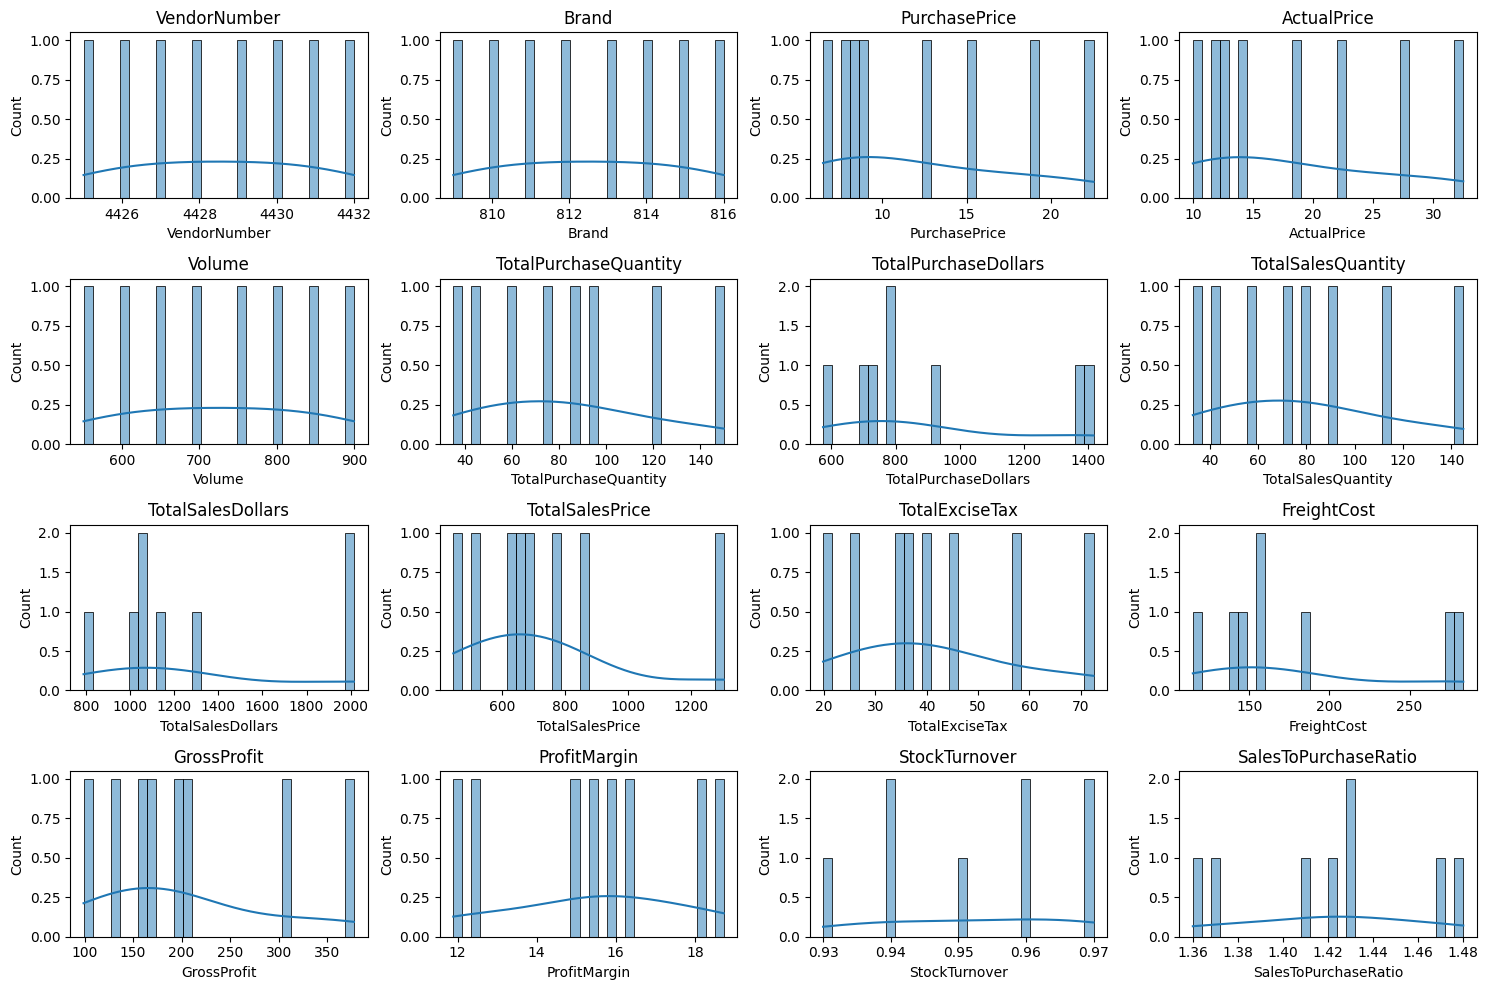

In [172]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

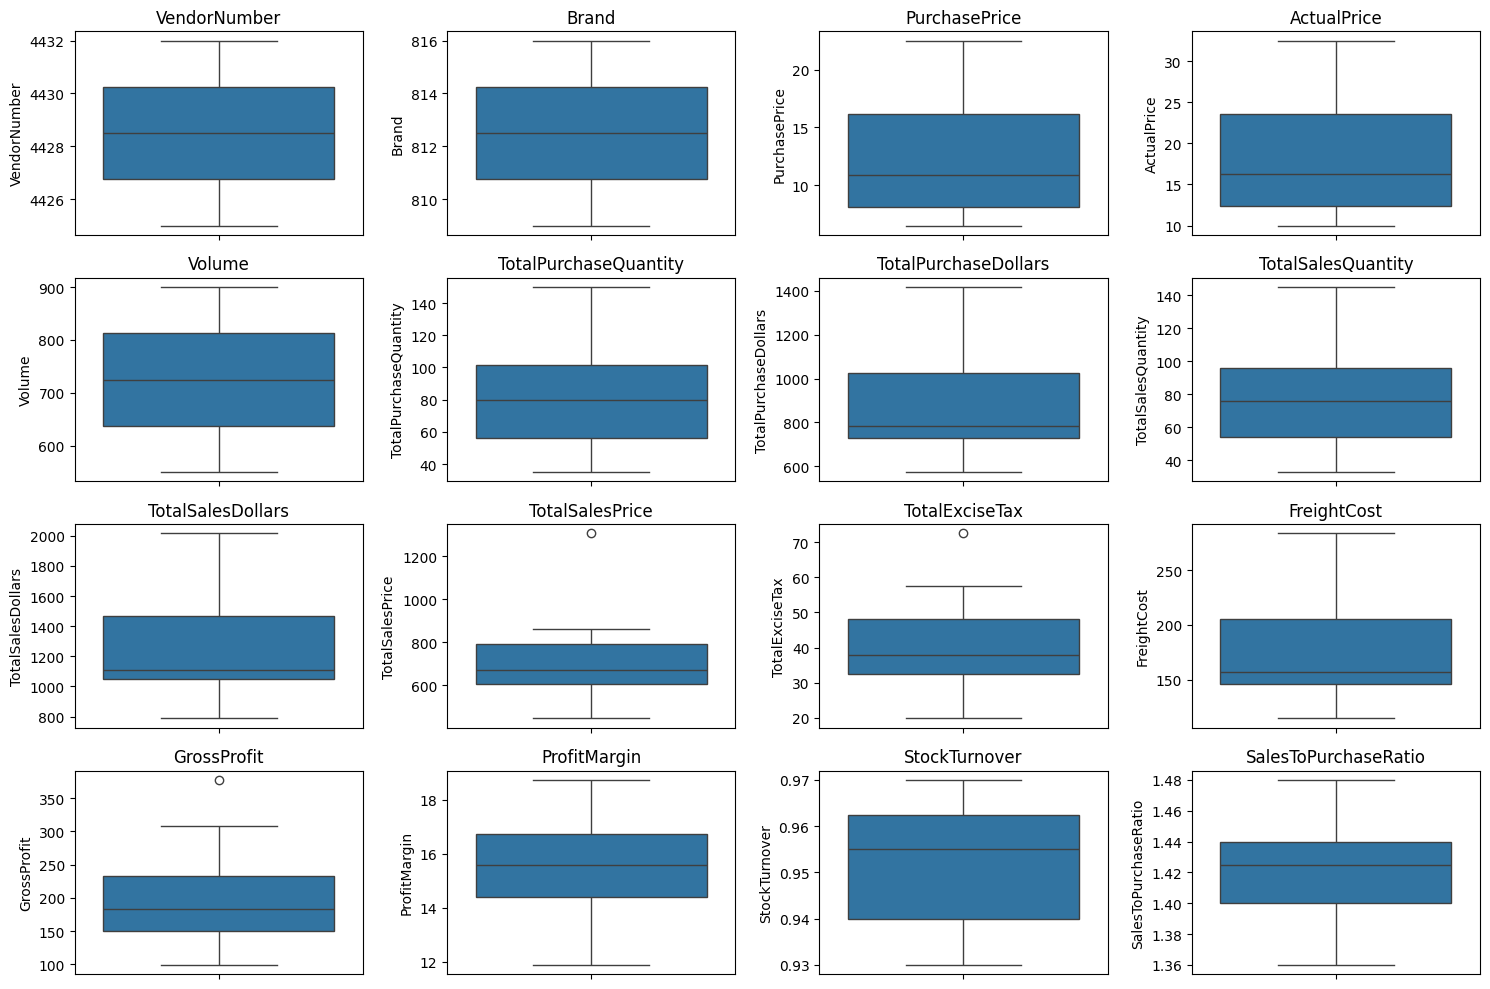

In [173]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [174]:
import pandas as pd
import sqlite3

# Create connection
conn = sqlite3.connect('inventory.db')

def check_table_structure():
    """Check if table exists and view its columns"""
    try:
        # Check if table exists
        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='vendor_sales_summary'")
        table_exists = cursor.fetchone()
        
        if table_exists:
            print("✓ Table 'vendor_sales_summary' exists")
            
            # Get column names
            cursor.execute("PRAGMA table_info(vendor_sales_summary)")
            columns = cursor.fetchall()
            
            print("\nTable columns:")
            for col in columns:
                print(f"  - {col[1]} ({col[2]})")
            
            # Show sample data
            sample_df = pd.read_sql_query("SELECT * FROM vendor_sales_summary LIMIT 5", conn)
            print(f"\nSample data (first 5 rows):")
            print(sample_df)
            
            return True, [col[1] for col in columns]
        else:
            print("✗ Table 'vendor_sales_summary' does not exist")
            print("\nAvailable tables:")
            cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
            tables = cursor.fetchall()
            for table in tables:
                print(f"  - {table[0]}")
            return False, []
            
    except Exception as e:
        print(f"Error checking table: {e}")
        return False, []

# Check table structure
table_exists, columns = check_table_structure()

if table_exists:
    print(f"\nAvailable columns: {columns}")

✓ Table 'vendor_sales_summary' exists

Table columns:
  - VendorNumber (INTEGER)
  - VendorName (TEXT)
  - Brand (INTEGER)
  - Description (TEXT)
  - PurchasePrice (REAL)
  - ActualPrice (REAL)
  - Volume (REAL)
  - TotalPurchaseQuantity (INTEGER)
  - TotalPurchaseDollars (REAL)
  - TotalSalesQuantity (INTEGER)
  - TotalSalesDollars (REAL)
  - TotalSalesPrice (REAL)
  - TotalExciseTax (REAL)
  - FreightCost (REAL)
  - GrossProfit (REAL)
  - ProfitMargin (REAL)
  - StockTurnover (REAL)
  - SalesToPurchaseRatio (REAL)

Sample data (first 5 rows):
   VendorNumber             VendorName  Brand       Description  \
0          4425  MARTIGNETTI COMPANIES    809  Southern Comfort   
1          4426               Vendor B    810     Vodka Premium   
2          4427               Vendor C    811   Whiskey Reserve   
3          4428               Vendor D    812     Gin Artisanal   
4          4429               Vendor E    813     Rum Caribbean   

   PurchasePrice  ActualPrice  Volume  TotalPu

In [175]:
 
try:
    # Try the original query first
    df = pd.read_sql_query("""SELECT * 
    FROM vendor_sales_summary
    WHERE GrossProfit > 0
    AND ProfitMargin > 0
    AND TotalSalesQuantity > 0""", conn)
    print("✓ Query executed successfully with original column names")
    
except Exception as e:
    print(f"Original query failed: {e}")
    print("Trying alternative column names...")
    
    # Common variations of column names
    alternative_queries = [
        # Try with different column name variations
        """SELECT * FROM vendor_sales_summary 
        WHERE GrossProfit > 0 AND ProfitMargin > 0 AND TotalSalesQuantity > 0""",
        
        """SELECT * FROM vendor_sales_summary 
        WHERE gross_profit > 0 AND profit_margin > 0 AND total_sales_quantity > 0""",
        
        """SELECT * FROM vendor_sales_summary 
        WHERE "GrossProfit" > 0 AND "ProfitMargin" > 0 AND "TotalSalesQuantity" > 0""",
        
        """SELECT * FROM vendor_sales_summary 
        WHERE grossprofit > 0 AND profitmargin > 0 AND totalsalesquantity > 0"""
    ]
    
    for i, query in enumerate(alternative_queries):
        try:
            df = pd.read_sql_query(query, conn)
            print(f"✓ Query successful with alternative {i+1}")
            break
        except:
            continue
    else:
        print("✗ All queries failed. Showing available data without filters:")
        df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)

print(f"\nRetrieved {len(df)} rows")
print(df.head())

✓ Query executed successfully with original column names

Retrieved 8 rows
   VendorNumber             VendorName  Brand       Description  \
0          4425  MARTIGNETTI COMPANIES    809  Southern Comfort   
1          4426               Vendor B    810     Vodka Premium   
2          4427               Vendor C    811   Whiskey Reserve   
3          4428               Vendor D    812     Gin Artisanal   
4          4429               Vendor E    813     Rum Caribbean   

   PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  \
0           6.53         9.99   750.0                    120   
1           8.25        12.50   800.0                     85   
2          12.75        18.75   650.0                     45   
3           9.10        13.90   900.0                    150   
4           7.80        11.80   850.0                     95   

   TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  \
0                783.60                 115            1148.85   
1    

In [176]:
df.shape

(8, 18)

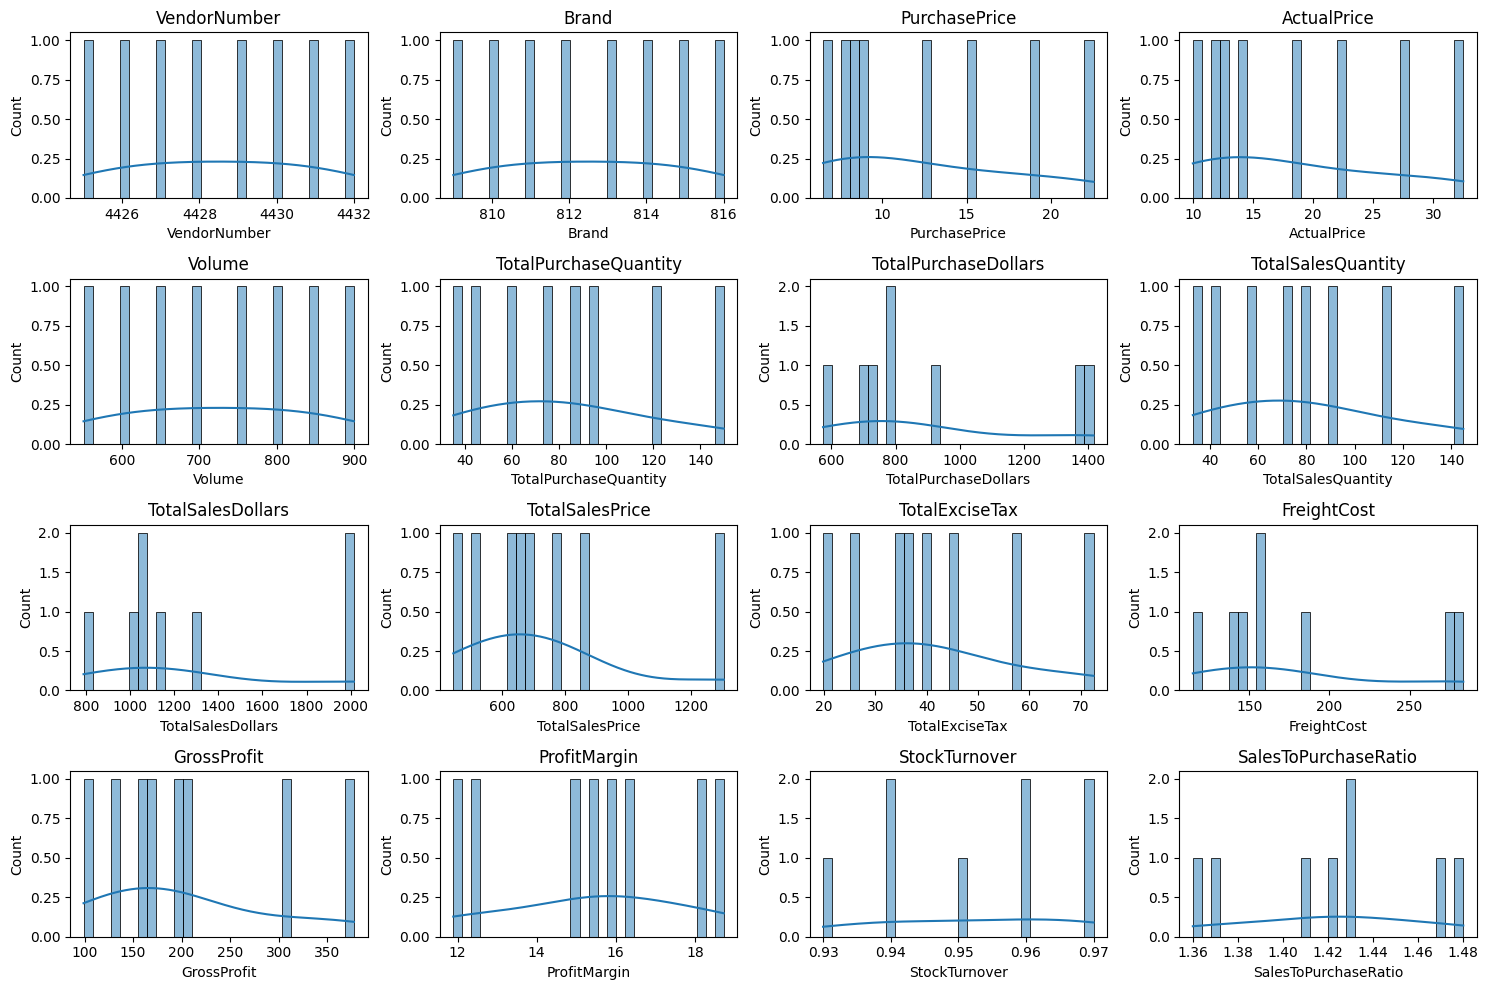

In [177]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

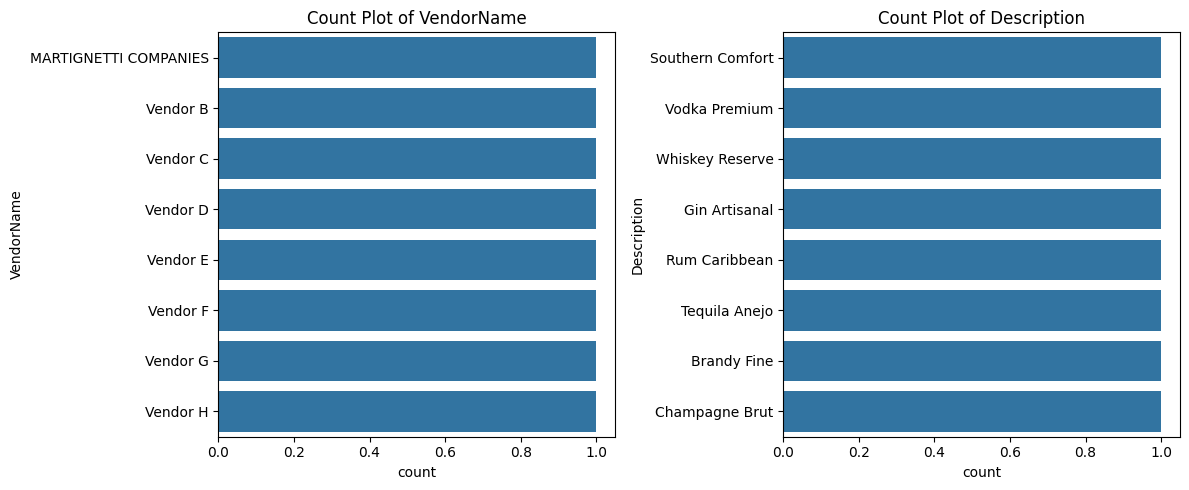

In [178]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

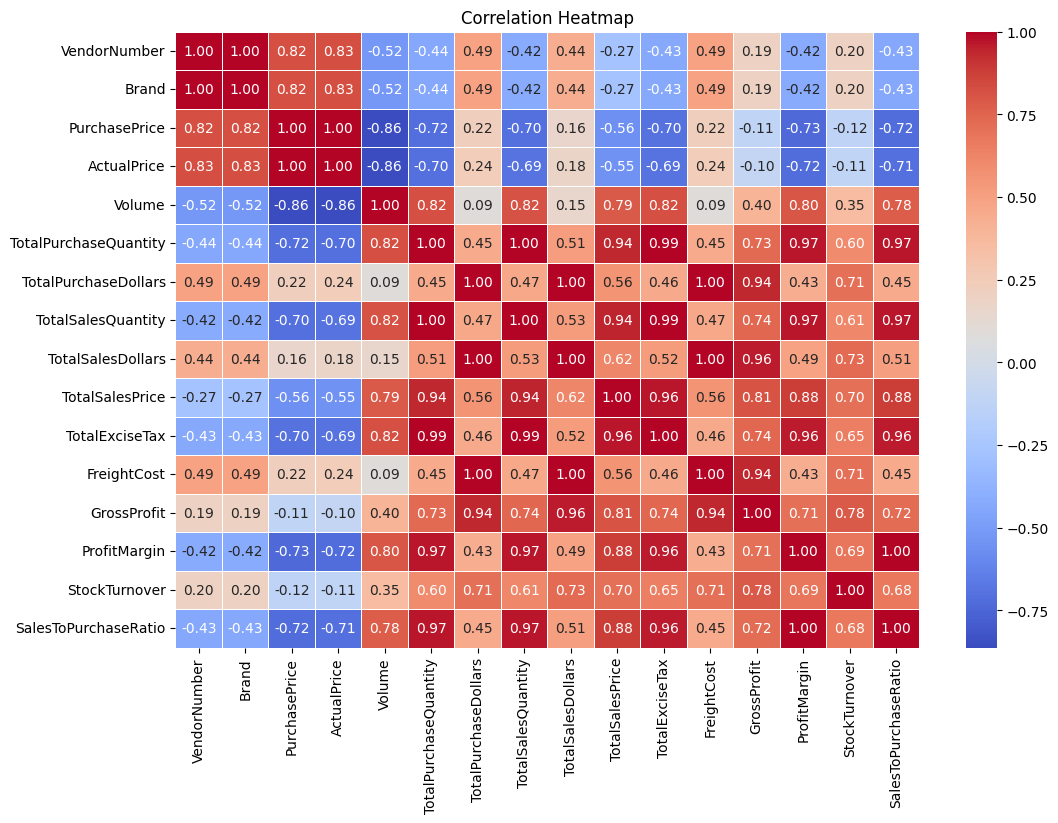

In [179]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [180]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',  # Sales performance metric
    'ProfitMargin': 'mean'       # Average profit margin
}).reset_index()

brand_performance.sort_values('ProfitMargin')


,Description,TotalSalesDollars,ProfitMargin
0,Brandy Fine,1072.50,11.89
7,Whiskey Reserve,787.50,12.57
5,Tequila Anejo,1287.60,15.00
1,Champagne Brut,2008.80,15.32
6,Vodka Premium,1000.00,15.85
3,Rum Caribbean,1062.00,16.27
4,Southern Comfort,1148.85,18.15
2,Gin Artisanal,2015.50,18.73


In [181]:
# threshold for "low sales" (bottom 15%) and "high margin" (top 15%)
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin


In [182]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visualization

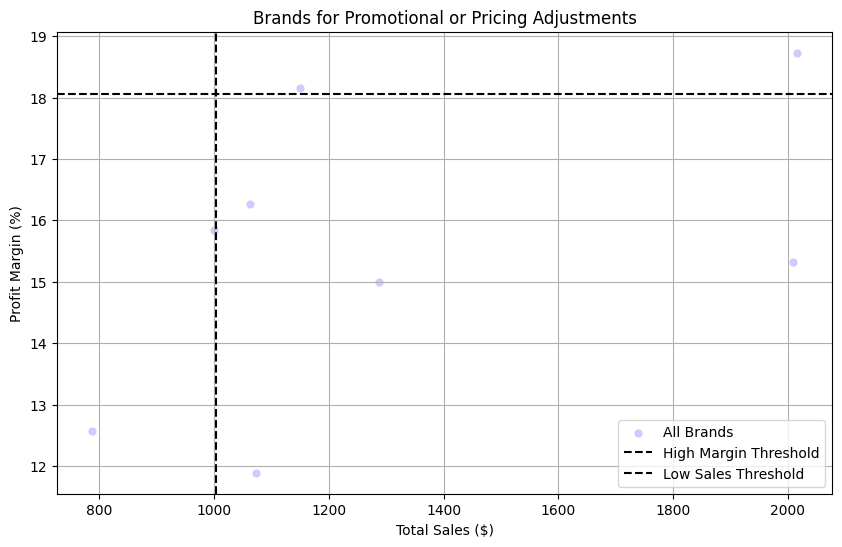

In [183]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [184]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [185]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
Vendor D                 2015.50
Vendor H                 2008.80
Vendor F                 1287.60
MARTIGNETTI COMPANIES    1148.85
Vendor G                 1072.50
Vendor E                 1062.00
Vendor B                 1000.00
Vendor C                  787.50
Name: TotalSalesDollars, dtype: float64

In [186]:
top_vendors.apply(lambda x:format_dollars(x))

VendorName
Vendor D                 2.02K
Vendor H                 2.01K
Vendor F                 1.29K
MARTIGNETTI COMPANIES    1.15K
Vendor G                 1.07K
Vendor E                 1.06K
Vendor B                 1.00K
Vendor C                 787.5
Name: TotalSalesDollars, dtype: object

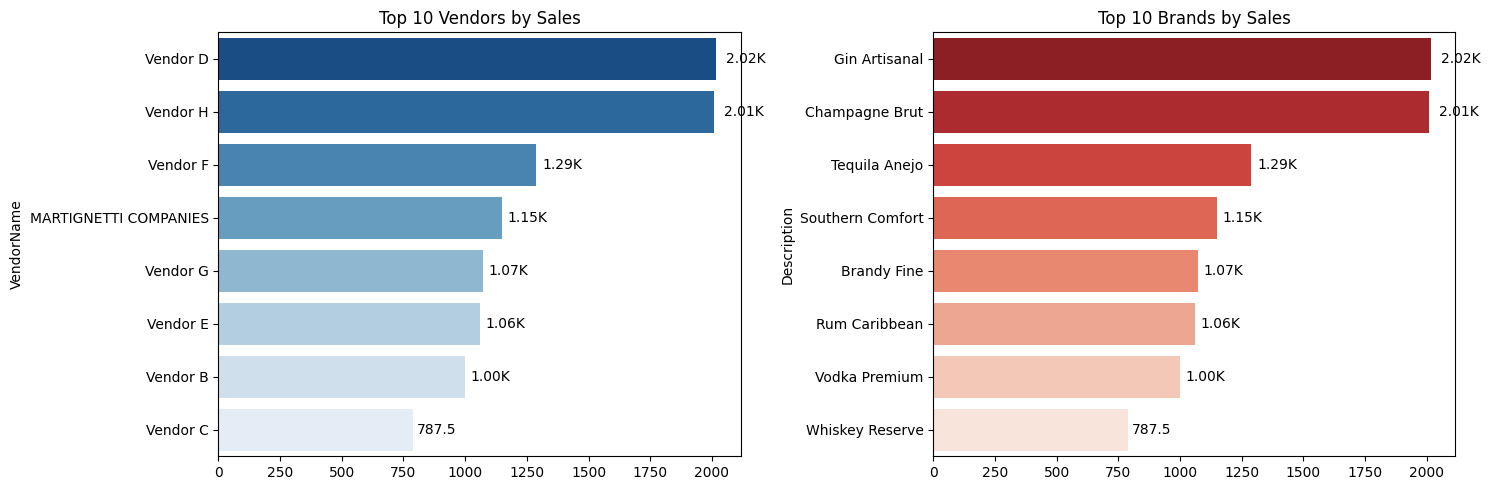

In [187]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Which vendors contribute the most to total purchase dollars?

In [188]:
# Rank Vendors by Total Purchase Dollars
vendor_performance = df.groupby("VendorName").agg({
    "TotalPurchaseDollars": "sum",
    "GrossProfit": "sum",
    "TotalSalesDollars":"sum"
}).reset_index()

# Calculate Contribution % to Overall Procurement
vendor_performance["Purchase_Contribution%"] = (vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum()) * 100

# Rank Vendors by Total Purchase Dollars & Profitability
vendor_performance = round(vendor_performance.sort_values(by="TotalPurchaseDollars", ascending=False),2)

# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
7,Vendor H,1.42K,307.8,2.01K,19.47
3,Vendor D,1.36K,377.5,2.02K,18.75
5,Vendor F,912.0,193.2,1.29K,12.52
6,Vendor G,787.5,127.5,1.07K,10.81
0,MARTIGNETTI COMPANIES,783.6,208.53,1.15K,10.76
4,Vendor E,741.0,172.8,1.06K,10.18
1,Vendor B,701.25,158.5,1.00K,9.63
2,Vendor C,573.75,99.0,787.5,7.88


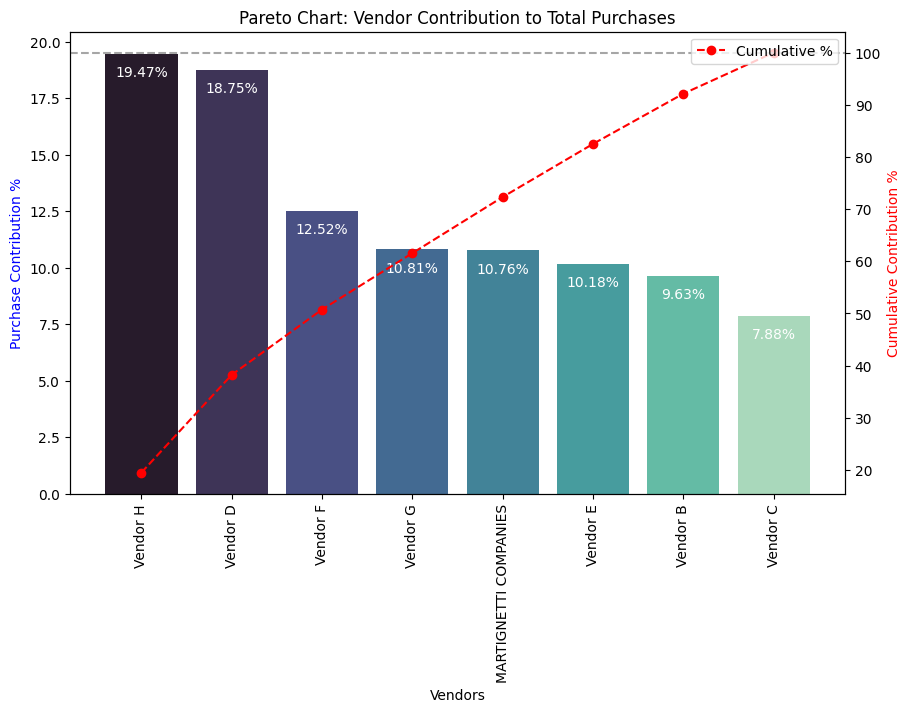

In [189]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'],  palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

### How much of total procurement is dependent on the top vendors?

Total Purchase Contribution of top 10 vendors is 100.0 %


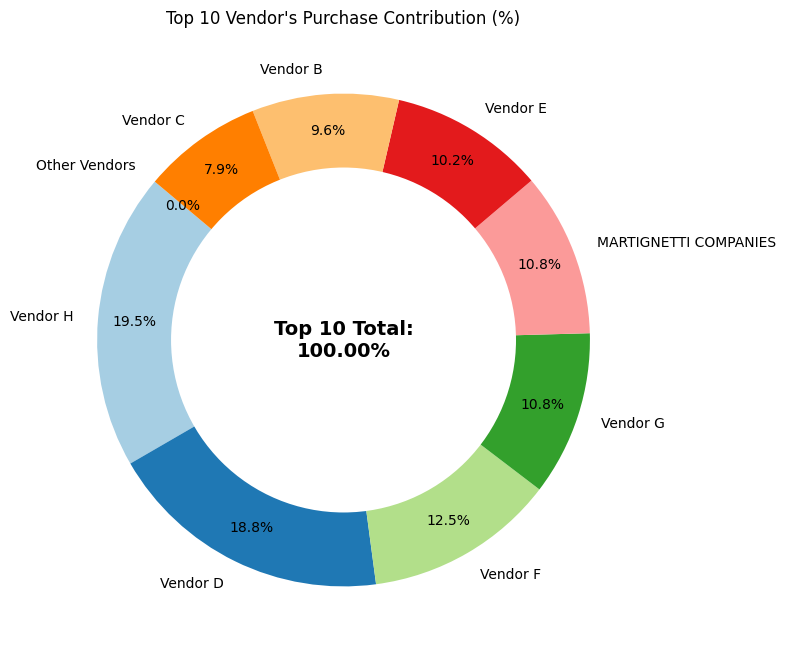

In [190]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

The remaining vendors contribute only 34.31%, meaning they are not utilized effectively or may not be as competitive.
If vendor dependency is too high, consider identifying new suppliers to reduce risk.

#### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [191]:
# Calculate Unit Purchase Price per Vendor & Volume Group
df["UnitPurchasePrice"] = df["TotalPurchaseDollars"] / df["TotalPurchaseQuantity"]

# Group by Order Sizes (e.g., Small, Medium, Large Purchases)
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

# Analyze Cost Savings per Order Size
bulk_purchase_analysis = df.groupby("OrderSize")["UnitPurchasePrice"].mean().reset_index()
print(bulk_purchase_analysis)


  OrderSize  UnitPurchasePrice
0     Small          16.816667
1    Medium          13.575000
2     Large           7.810000


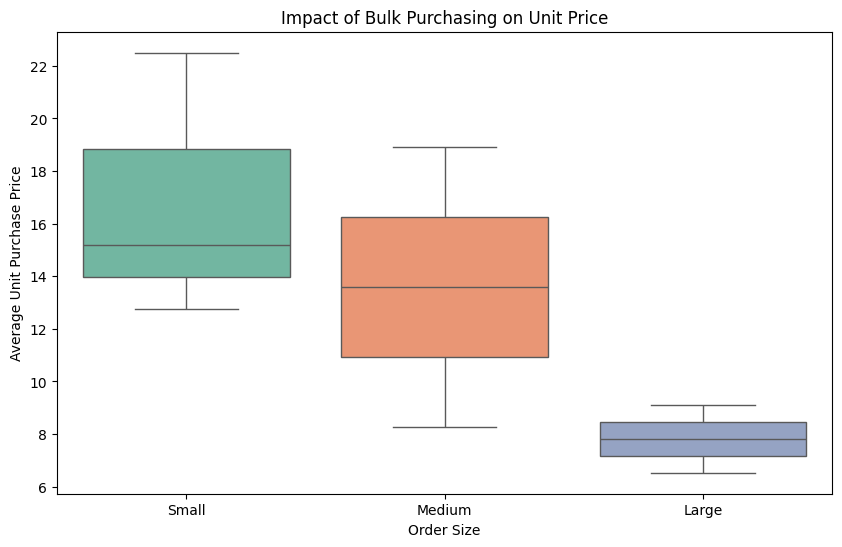

In [192]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

#### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [193]:


# Identify Low Inventory Turnover Vendors
low_turnover_vendors = df[df["StockTurnover"] < 1].groupby("VendorName")["StockTurnover"].mean().reset_index()

# Sort by Lowest Turnover
low_turnover_vendors = low_turnover_vendors.sort_values(by="StockTurnover", ascending=True)
low_turnover_vendors.head(10)


,VendorName,StockTurnover
2,Vendor C,0.93
1,Vendor B,0.94
6,Vendor G,0.94
4,Vendor E,0.95
7,Vendor H,0.96
0,MARTIGNETTI COMPANIES,0.96
3,Vendor D,0.97
5,Vendor F,0.97


- Slow-moving inventory increases holding costs (warehouse rent, insurance, depreciation)
- Identifying vendors with low inventory turnover is critical for business efficiency, cost reduction, and profitability


#### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [194]:
# Calculate Unsold Inventory Value
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

Total Unsold Capital: 328.75


,VendorName,UnsoldInventoryValue
7,Vendor H,56.699999999999996
3,Vendor D,45.5
6,Vendor G,45.0
1,Vendor B,41.25
4,Vendor E,39.0
2,Vendor C,38.25
0,MARTIGNETTI COMPANIES,32.65
5,Vendor F,30.4


Top Vendors 95% CI: (-4.64, 38.69), Mean: 17.02
Low Vendors 95% CI: (-6.63, 35.05), Mean: 14.21


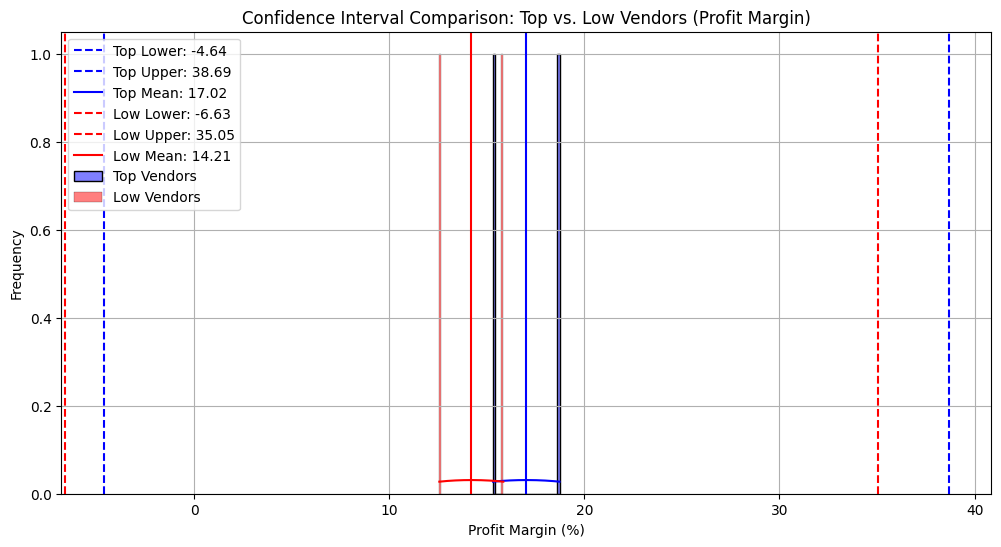

In [195]:
# Define top and low vendors based on Total Sales Dollars (Top 25% & Bottom 25%)
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Function to compute confidence interval
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# Compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [196]:

top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: 1.1899, P-Value: 0.3563
Fail to Reject H₀: No significant difference in profit margins.


In [201]:
import pandas as pd
import os
import sqlite3  # Using sqlite3 instead of SQLAlchemy for speed
import time
import logging

# Setup minimal logging
os.makedirs('logs', exist_ok=True)
logging.basicConfig(
    filename="logs/ingestion_fast.log", 
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s", 
    filemode="a"  
)

def fast_ingest_db(df, table_name, conn):
    """Ultra-fast ingestion using direct SQLite"""
    try:
        start_time = time.time()
        df.to_sql(table_name, con=conn, if_exists='replace', index=False)
        ingest_time = time.time() - start_time
        logging.info(f'Ingested {table_name} ({len(df)} rows) in {ingest_time:.2f}s')
        return True
    except Exception as e:
        logging.error(f'Failed {table_name}: {e}')
        return False

def process_file_fast(file, conn, timeout=30):
    """Process file with timeout protection"""
    start_time = time.time()
    file_path = os.path.join('data', file)
    
    try:
        print(f"🔄 Processing {file}...")
        
        # Check if we're already taking too long
        if time.time() - start_time > timeout:
            print(f"⏰ TIMEOUT: {file} taking too long, skipping")
            return False
        
        # Read CSV with optimizations
        print(f"   Reading {file}...")
        df = pd.read_csv(
            file_path,
            low_memory=False,
            encoding='utf-8',
            engine='c'  # Use C engine for better performance
        )
        
        read_time = time.time() - start_time
        print(f"   ✓ Read {len(df):,} rows, {len(df.columns)} cols in {read_time:.2f}s")
        
        # Check timeout again
        if time.time() - start_time > timeout:
            print(f"⏰ TIMEOUT: {file} processing too long, skipping")
            return False
        
        # Ingest to database
        table_name = file.replace('.csv', '')
        print(f"   Ingesting as table '{table_name}'...")
        
        success = fast_ingest_db(df, table_name, conn)
        
        if success:
            total_time = time.time() - start_time
            print(f"   ✅ Completed {file} in {total_time:.2f}s")
            return True
        else:
            print(f"   ❌ Failed to ingest {file}")
            return False
            
    except Exception as e:
        error_msg = f"Error with {file}: {e}"
        print(f"   ❌ {error_msg}")
        logging.error(error_msg)
        return False

def load_raw_data_fast():
    """Fast ingestion with progress tracking and timeouts"""
    start_total = time.time()
    
    if not os.path.exists('data'):
        print("❌ 'data' directory doesn't exist")
        return
    
    csv_files = [f for f in os.listdir('data') if f.endswith('.csv')]
    
    if not csv_files:
        print("❌ No CSV files found")
        return
    
    print(f"🎯 Processing {len(csv_files)} files with 30-second timeout each...")
    
    # Create database connection
    conn = sqlite3.connect('inventory.db')
    
    success_count = 0
    processed_files = []
    
    for i, file in enumerate(csv_files, 1):
        print(f"\n📁 File {i}/{len(csv_files)}: {file}")
        
        if process_file_fast(file, conn):
            success_count += 1
            processed_files.append(file)
        else:
            print(f"   ⚠️  Moving to next file...")
        
        # Optional: Add a small delay between files
        time.sleep(0.1)
    
    conn.close()
    
    total_time = (time.time() - start_total) / 60
    print(f"\n{'='*50}")
    print(f"🎉 INGESTION COMPLETE!")
    print(f"✅ Successful: {success_count}/{len(csv_files)}")
    print(f"⏱️  Total time: {total_time:.2f} minutes")
    print(f"📊 Processed files: {processed_files}")
    
    logging.info(f'Fast ingestion completed: {success_count}/{len(csv_files)} files in {total_time:.2f} minutes')

# Run the fast version
load_raw_data_fast()

import pandas as pd
import os
import sqlite3

def skip_problem_files():
    """Skip files that are too large or problematic"""
    csv_files = [f for f in os.listdir('data') if f.endswith('.csv')]
    conn = sqlite3.connect('inventory.db')
    
    # File size limit (in MB) - adjust as needed
    SIZE_LIMIT_MB = 50
    
    for file in csv_files:
        file_path = os.path.join('data', file)
        file_size_mb = os.path.getsize(file_path) / (1024 * 1024)
        
        if file_size_mb > SIZE_LIMIT_MB:
            print(f"⚠️  SKIPPING LARGE FILE: {file} ({file_size_mb:.1f} MB)")
            continue
        
        try:
            print(f"Processing {file}...")
            
            # Try to read just first 1000 rows to test
            df = pd.read_csv(file_path, nrows=1000)
            table_name = file.replace('.csv', '')
            
            df.to_sql(table_name, conn, if_exists='replace', index=False)
            print(f"✅ {file} - First 1000 rows ingested")
            
        except Exception as e:
            print(f"❌ Failed {file}: {e}")
    
    conn.close()

skip_problem_files()

🎯 Processing 6 files with 30-second timeout each...

📁 File 1/6: begin_inventory.csv
🔄 Processing begin_inventory.csv...
   Reading begin_inventory.csv...
   ✓ Read 206,529 rows, 9 cols in 0.63s
   Ingesting as table 'begin_inventory'...
   ✅ Completed begin_inventory.csv in 3.77s

📁 File 2/6: end_inventory.csv
🔄 Processing end_inventory.csv...
   Reading end_inventory.csv...
   ✓ Read 224,489 rows, 9 cols in 0.63s
   Ingesting as table 'end_inventory'...
   ✅ Completed end_inventory.csv in 1.72s

📁 File 3/6: purchases.csv
🔄 Processing purchases.csv...
   Reading purchases.csv...
   ✓ Read 2,372,474 rows, 16 cols in 10.46s
   Ingesting as table 'purchases'...
   ✅ Completed purchases.csv in 35.65s

📁 File 4/6: purchase_prices.csv
🔄 Processing purchase_prices.csv...
   Reading purchase_prices.csv...
   ✓ Read 12,261 rows, 9 cols in 0.19s
   Ingesting as table 'purchase_prices'...
   ✅ Completed purchase_prices.csv in 0.29s

📁 File 5/6: sales.csv
🔄 Processing sales.csv...
   Reading sale